<h2>Importation des bibliotheques</h2>

In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
# !pip install yellobrick
# from yellowbrick.cluster import KElbowVisualiser

<h3>Importation des donnees</h3>

In [43]:
#importation

df = pd.read_csv("./Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


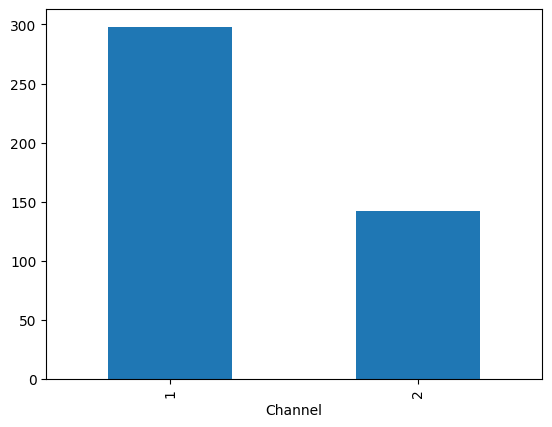

In [44]:
#types de distribution ou cannaux des clients
df['Channel'].value_counts().plot(kind= 'bar');

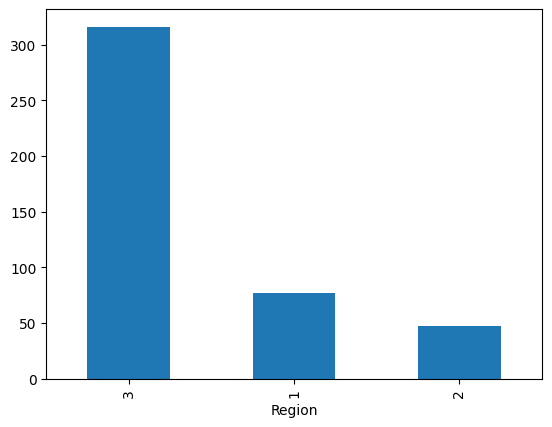

In [45]:
# Region des clients
df['Region'].value_counts().plot(kind= 'bar');


In [46]:
# Renommage des variables et de modalites

df.rename(columns={'Delicassen': 'Delicatessen'}) #===( delicatessen siginifie epicerie fine )

df['Channel'] = df['Channel'].map({1: 'HoReCa', 2: 'Retail'}) #==( Retail siginifie vente ou detail)
df['Region'] = df['Region'].map({1: 'Lisbon', 2: 'Porto', 3: 'other'})

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,other,12669,9656,7561,214,2674,1338
1,Retail,other,7057,9810,9568,1762,3293,1776
2,Retail,other,6353,8808,7684,2405,3516,7844
3,HoReCa,other,13265,1196,4221,6404,507,1788
4,Retail,other,22615,5410,7198,3915,1777,5185


In [47]:
# table de frequence de la variable Region

df['Region'].value_counts()

Region
other     316
Lisbon     77
Porto      47
Name: count, dtype: int64

In [48]:
# table de frequence normalise(en pourcentage) de la variable Region

df['Region'].value_counts(normalize=True)

Region
other     0.718182
Lisbon    0.175000
Porto     0.106818
Name: proportion, dtype: float64

In [49]:
# Stockage des noms de colonnes dans une liste

features = df.columns.tolist()
features

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

<h3>Resumer statistique des donnees</h3>

In [50]:
# Resumer statistique

df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [51]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicassen        440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


In [52]:
# sauvegarde du dataframe

df.to_csv("data_processed.csv")

# importation

df = pd.read_csv('data_processed.csv', index_col=0)

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,other,12669,9656,7561,214,2674,1338
1,Retail,other,7057,9810,9568,1762,3293,1776
2,Retail,other,6353,8808,7684,2405,3516,7844
3,HoReCa,other,13265,1196,4221,6404,507,1788
4,Retail,other,22615,5410,7198,3915,1777,5185


<h3>Visualisation des donnees</h3>

In [53]:
features

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

In [54]:
df['Channel'].value_counts()

Channel
HoReCa    298
Retail    142
Name: count, dtype: int64

In [55]:
# Obtenir une palette de couleurs prédéfinie
cmap = plt.get_cmap('tab20')
colors = cmap.colors[:len(df)]

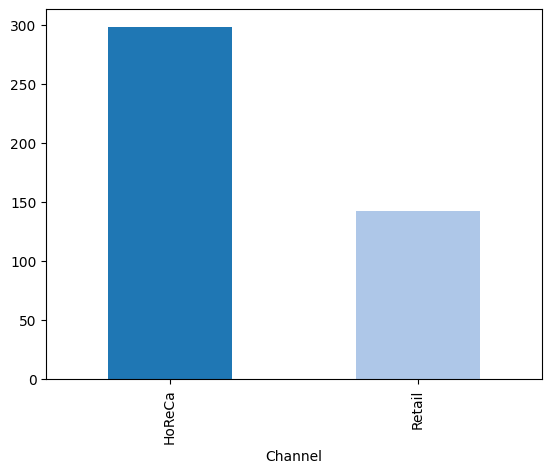

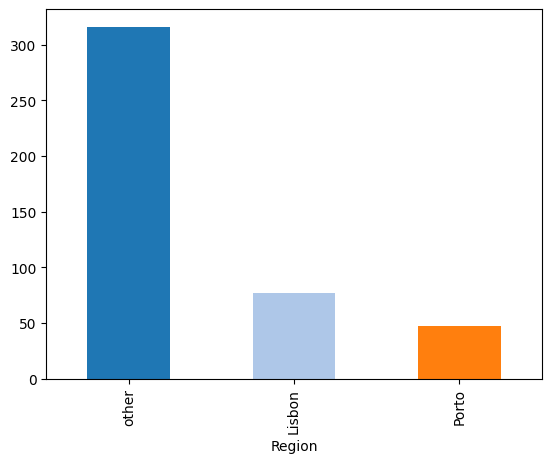

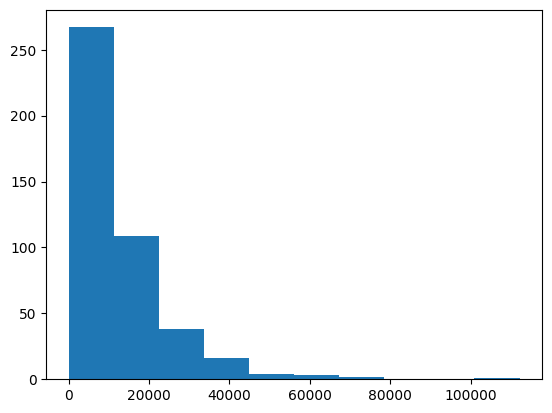

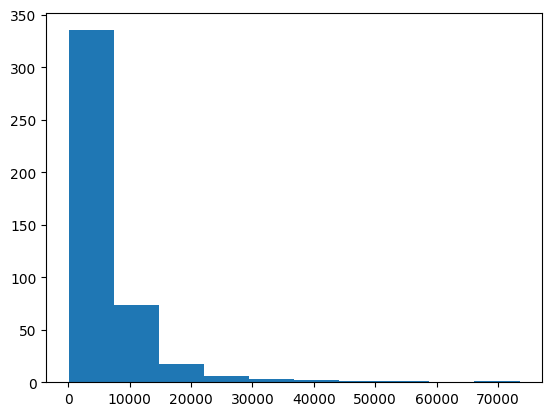

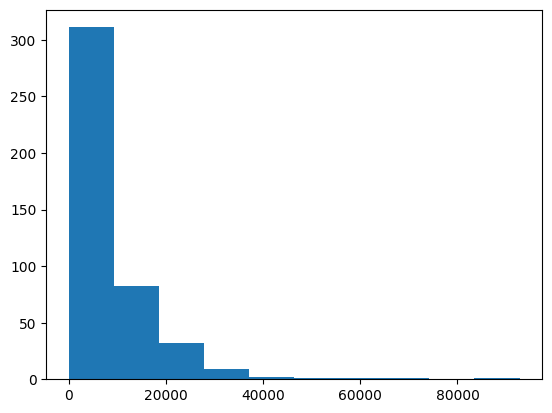

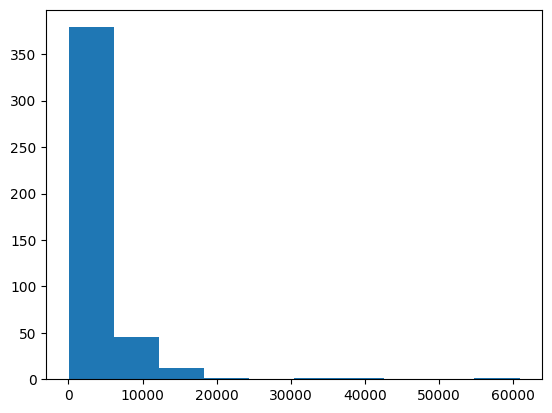

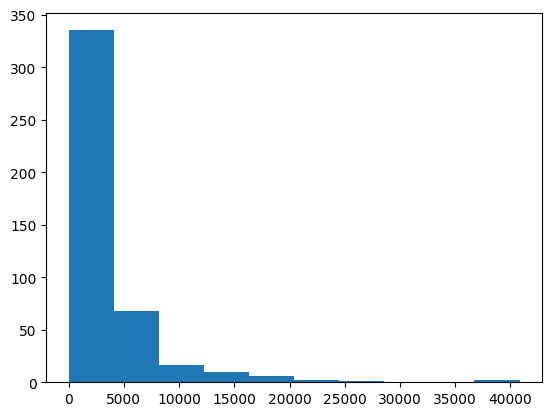

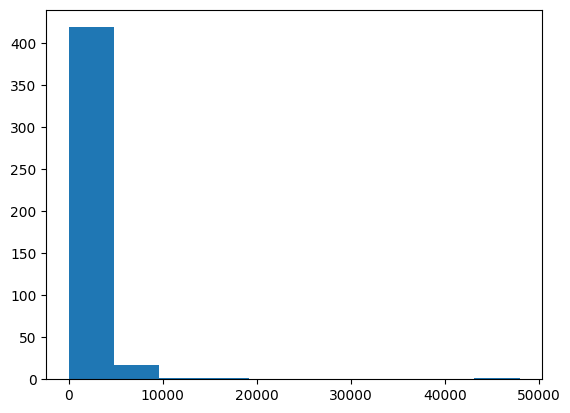

In [56]:
# diagrammes en barre et histogramme
for feature in features:
    if (feature == 'Region') or (feature == 'Channel'):
        df[feature].value_counts().plot(kind='bar', color=colors)
    else:
        df[feature].hist(grid=False)
    plt.show()
        
    

<h3>ACP lineaire</h3>

In [57]:

df.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,other,12669,9656,7561,214,2674,1338
1,Retail,other,7057,9810,9568,1762,3293,1776
2,Retail,other,6353,8808,7684,2405,3516,7844


In [58]:
data = df.drop(columns=['Channel', 'Region'])

In [59]:
data.head(3)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844


In [60]:
# Standartisation  des donnees
scaler = StandardScaler()
data = scaler.fit_transform(data)
type(data)
data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [61]:
# sauvegarde d'un tableaun numpy

np.save("training_data.npy",data)

In [62]:
# application de l'APC (2 composantes)

pca = PCA(n_components=2)
res_pca = pca.fit_transform(data)
type(res_pca)

numpy.ndarray

In [63]:
res_pca

array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.

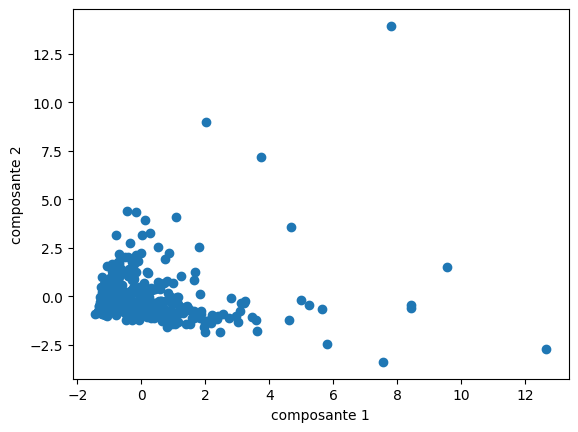

In [64]:
#visualisation

plt.scatter(res_pca[:,0], res_pca[:, 1]);
plt.xlabel("composante 1")
plt.ylabel("composante 2")
plt.show()


In [65]:
# calcule du coeficient de correlation de Pearson obtenue apres ACP

print(pearsonr(res_pca[:,0], res_pca[:, 1]))

PearsonRResult(statistic=-2.940356291780688e-16, pvalue=0.9999999999999947)


<h3 style="color:rgb(236, 105, 17);">Interpretation</h3>
Le coeficient de pearson nous donne une valeur 
de <strong style="color:rgb(24, 230, 151);">3.32x10^-16</strong>  qui est tres petite
ce qui nous permet de conclure que les donnees ne son pas correle

<h3> ACP non lineaire</h3>

In [107]:
# chargement des donnees

data = np.load("training_data.npy")

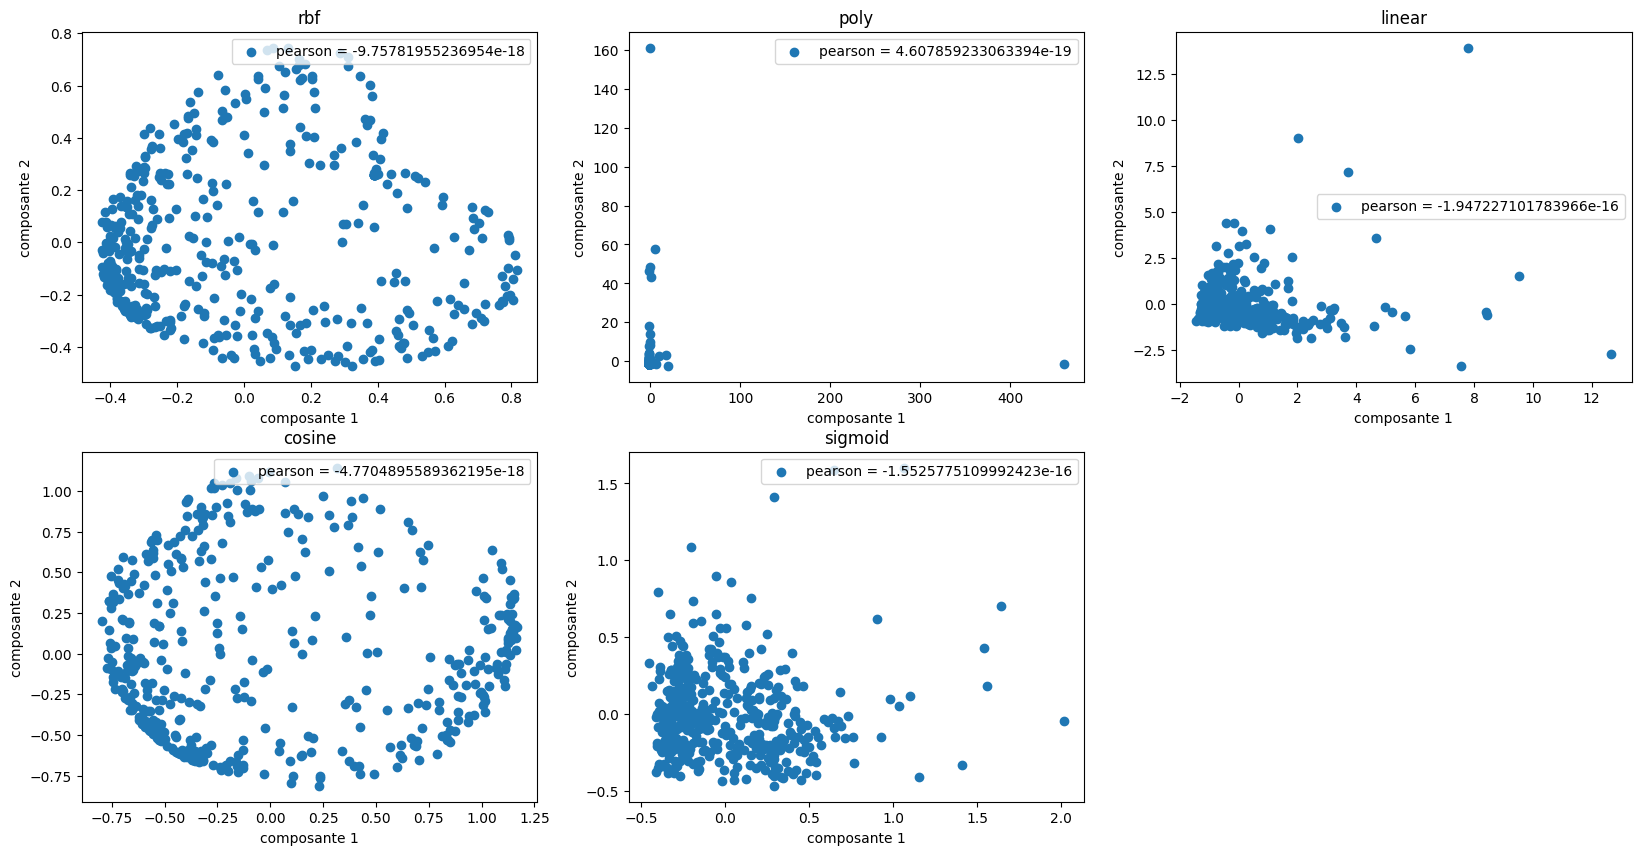

In [112]:
kernels = ['rbf', 'poly', 'linear', 'cosine', 'sigmoid']
res_kpca = dict()

for kernel in kernels:
    if kernel == 'poly':
        kpca = KernelPCA(n_components=2, kernel=kernel, degree=3)
    else:
        kpca = KernelPCA(n_components=2, kernel=kernel)
    res_kpca[kernel] = kpca.fit_transform(data)
    


# affichage des graphiques pour chaque kernel
plt.figure(figsize=(20, 10))
pearsonr_coef = dict()
i = 1
for kernel in kernels:
    ax = plt.subplot(2, 3, i)
    plt.title(kernel)
    ax.scatter(res_kpca[kernel][:,0], res_kpca[kernel][:, 1]);
    plt.xlabel("composante 1")
    plt.ylabel("composante 2")
    pearsonr_coef[kernel] = pearsonr(res_kpca[kernel][:,0], res_kpca[kernel][:,1])[0]
    ax.legend(['pearson = '+ str(pearsonr_coef[kernel])])
    i += 1
plt.show()

<h3>Comparaison des coeficient de coerelation de pearson de l'ACP lineaire et nom lineaire</h3>

In [ ]:
if pearsonr(res_kpca_rbf[:,0], res_kpca_rbf[:, 1]) >= pearsonr(res_pca[:,0], res_pca[:, 1]):
    print("L' ACP nom lineaire donnees des attributs plus correle")
else:
    print("L' ACP lineaire donnees des attributs plus correle")
    

L' ACP nom lineaire donnees des attributs plus correle


In [115]:
# Ajout des composant principales commes colonne de notre df

df['x_kpca_rbf'] = res_kpca['rbf'][:, 0]
df['y_kpca_rbf'] = res_kpca['rbf'][:, 1]

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,x_kpca_rbf,y_kpca_rbf
0,Retail,other,12669,9656,7561,214,2674,1338,0.078374,-0.173115
1,Retail,other,7057,9810,9568,1762,3293,1776,0.185813,-0.307415
2,Retail,other,6353,8808,7684,2405,3516,7844,0.341702,0.075048
3,HoReCa,other,13265,1196,4221,6404,507,1788,-0.253304,0.250352
4,Retail,other,22615,5410,7198,3915,1777,5185,0.136617,0.375279


<h2>Clustering k-means avec la methode de coude</h2>

In [116]:
# clustering avec 05 cluster

cluster_model = KMeans(n_clusters=5)
cluster_model.fit(res_kpca['rbf'])

clusters = cluster_model.predict(res_kpca['rbf'])

In [117]:
#affichage du  resultat
clusters

array([2, 2, 3, 0, 1, 4, 4, 2, 4, 3, 2, 4, 1, 3, 1, 4, 2, 4, 1, 4, 0, 4,
       1, 1, 1, 4, 4, 0, 3, 1, 0, 4, 0, 1, 4, 2, 1, 3, 3, 1, 1, 0, 3, 3,
       2, 3, 3, 1, 2, 3, 4, 4, 1, 2, 0, 4, 1, 3, 4, 2, 2, 1, 2, 3, 4, 1,
       2, 3, 4, 4, 1, 1, 0, 1, 2, 0, 4, 3, 4, 4, 4, 3, 2, 0, 4, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 2, 4, 2, 4, 4, 0, 3, 3, 2, 1, 4, 0, 2, 3, 2, 3,
       0, 3, 1, 0, 0, 4, 4, 4, 0, 4, 0, 4, 0, 2, 1, 1, 0, 1, 2, 1, 0, 4,
       0, 4, 4, 4, 2, 2, 0, 4, 0, 1, 1, 0, 0, 3, 4, 4, 4, 1, 0, 4, 0, 4,
       4, 3, 3, 0, 2, 3, 2, 0, 0, 3, 2, 3, 2, 4, 4, 4, 3, 3, 2, 3, 4, 2,
       1, 0, 4, 4, 2, 1, 2, 1, 4, 4, 4, 2, 2, 2, 0, 0, 4, 3, 4, 0, 1, 2,
       4, 4, 3, 3, 1, 4, 4, 3, 4, 2, 2, 3, 0, 1, 4, 2, 2, 3, 3, 0, 3, 4,
       0, 2, 0, 4, 4, 4, 0, 4, 4, 0, 0, 2, 0, 4, 0, 4, 4, 0, 4, 1, 1, 0,
       0, 4, 2, 3, 4, 0, 0, 0, 4, 1, 0, 1, 1, 1, 4, 4, 1, 1, 4, 0, 0, 4,
       3, 1, 3, 0, 3, 0, 4, 4, 2, 1, 4, 4, 1, 1, 0, 2, 4, 4, 1, 1, 1, 1,
       4, 0, 0, 1, 4, 4, 4, 3, 0, 4, 0, 4, 2, 4, 0,

Text(0.5, 1.0, 'Resultat du clustering')

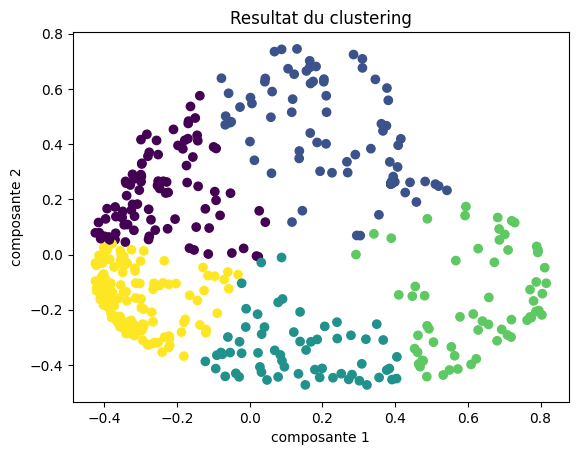

In [118]:
# visualisation des clusters

plt.scatter(res_kpca['rbf'][:, 0], res_kpca['rbf'][:, 1], c=clusters)
plt.xlabel("composante 1")
plt.ylabel("composante 2")
plt.title("Resultat du clustering")

<h3> Recherche du bon choix du nombre de cluster en utilisant la methode du coude</h3>

In [ ]:
#installation de yellowbrick
# pip install -U yellowbrick

In [ ]:
# # methode du coude 

# kmeans = KMeans()
# visualizer = KElbowVisualizer(kmeans, (2, 12))
# visualizer.fit(res_kpca['rbf'])
# visualizer.show()

In [119]:
# Ajout des clusters au df

df['cluster_kpca_rbf'] = clusters
df.to_csv('data_with_clusters.csv')

<h2>Analyse des resultats de la segmentation des clients</h2>

In [ ]:
# chargement des donnees

df = pd.read_csv("./data_with_clusters.csv")

In [120]:
# Impection des donnees

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,x_kpca_rbf,y_kpca_rbf,cluster_kpca_rbf
0,Retail,other,12669,9656,7561,214,2674,1338,0.078374,-0.173115,2
1,Retail,other,7057,9810,9568,1762,3293,1776,0.185813,-0.307415,2
2,Retail,other,6353,8808,7684,2405,3516,7844,0.341702,0.075048,3
3,HoReCa,other,13265,1196,4221,6404,507,1788,-0.253304,0.250352,0
4,Retail,other,22615,5410,7198,3915,1777,5185,0.136617,0.375279,1


In [137]:
features
ft = features[2:]
ft

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [125]:
# df['cluster_kpca_rbf']

<h3>Affichage de la moyenne par cluster de chaque attribut </h3>

In [138]:
#centroide

df.groupby('cluster_kpca_rbf')[features[2:]].median()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster_kpca_rbf,,,,,,
0,16448.0,1840.0,2501.0,2532.0,352.0,911.0
1,27380.0,4959.0,6633.0,5154.0,764.0,2168.0
2,3116.5,6401.0,9682.0,755.5,3935.0,1147.5
3,4054.5,10787.5,18782.0,1143.0,7624.5,1113.0
4,5688.0,1933.5,2340.5,1171.5,354.0,571.0


<h3>Affichage de la moyenne par cluster, par cannaux de distribution et par region de chaque attribut </h3>

In [139]:
df.groupby(['cluster_kpca_rbf', 'Channel', 'Region'])[features[2:]].median()


Fresh     Milk  Grocery   Frozen  \
cluster_kpca_rbf Channel Region                                       
0                HoReCa  Lisbon  15637.0   1627.5   2238.0   3142.0   
                         Porto   16933.0   1511.0   2842.0   3045.0   
                         other   16260.0   1825.0   2406.0   2583.0   
                 Retail  Lisbon  15927.0   5955.0   7413.5   5040.0   
                         Porto   16448.0   6243.0   6360.0    824.0   
                         other   17304.5   4683.0   6027.5   1062.5   
1                HoReCa  Lisbon  30075.0   6084.0   5969.0   5154.0   
                         Porto   18334.5   1913.5   7650.5  14085.0   
                         other   30695.5   3792.5   4536.5   7994.0   
                 Retail  Lisbon   9126.5  25729.5  36640.0   5741.0   
                         Porto   16823.0   4980.0  10790.0   1365.0   
                         other   22786.0  11047.5  13051.5   2410.5   
2                HoReCa  Lisbon   2830.5   7639.0   6865.0   1256.0   
                         other    2438.0   5499.0   8335.0    364.0   
                 Retail  Lisbon   2427.0   6551.0  10391.0   1127.0   
                         Porto    2886.0   5302.0   9785.0    799.0   
                         other    4692.0   6459.0   9794.0    833.0   
3                HoReCa  Lisbon   2806.0  10765.0  15538.0   1374.0   
                         other   11908.5  15602.5  14858.0   3388.0   
                 Retail  Lisbon   2797.0  10737.0  21014.5   1012.0   
                         Porto    3297.5  13091.5  18408.5   1181.0   
                         other    4591.0  10646.0  18881.0   1116.0   
4                HoReCa  Lisbon   6823.5   1962.0   2087.0   1169.0   
                         Porto    6987.0   1610.0   3558.0   1483.0   
                         other    4760.0   1936.0   2232.0   1170.0   
                 Retail  Lisbon   2790.0   2527.0   5265.0   5612.0   
                         Porto    7839.0   2548.0   6110.0    936.0   
                         other   12126.0   3880.0   6235.0   1093.0   

                                 Detergents_Paper  Delicassen  
cluster_kpca_rbf Channel Region                                
0                HoReCa  Lisbon             304.5       791.5  
                         Porto              351.0       925.0  
                         other              349.0       838.0  
                 Retail  Lisbon            1761.5      1845.0  
                         Porto             2662.0      2005.0  
                         other             2087.5      1954.0  
1                HoReCa  Lisbon             746.5      2720.0  
                         Porto              335.0       833.5  
                         other              468.5      1821.5  
                 Retail  Lisbon           19002.0      3995.5  
                         Porto             4111.0      2139.0  
                         other             4551.5      2492.0  
2                HoReCa  Lisbon            3262.0       923.0  
                         other             3084.0       707.0  
                 Retail  Lisbon            5316.0       791.0  
                         Porto             4538.0       555.0  
                         other             4095.0      1426.0  
3                HoReCa  Lisbon            5828.0      2388.0  
                         other             2680.5      3507.0  
                 Retail  Lisbon            9099.0      1031.0  
                         Porto             9179.0       954.0  
                         other             7572.0      1111.0  
4                HoReCa  Lisbon             405.5       479.5  
                         Porto              290.0       834.0  
                         other              302.0       569.0  
                 Retail  Lisbon             788.0      1360.0  
                         Porto             2960.0       392.5  
                         other             2730.

<h3>Affichage de la moyenne par cluster et par region de chaque attribut </h3>

In [140]:
df.groupby(['cluster_kpca_rbf', 'Region'])[features[2:]].median()


Fresh     Milk  Grocery   Frozen  Detergents_Paper  \
cluster_kpca_rbf Region                                                         
0                Lisbon  15637.0   1790.5   2440.5   3142.0             329.0   
                 Porto   16690.5   1762.0   3078.5   2707.0             396.5   
                 other   16731.0   1887.0   2479.0   2436.0             386.0   
1                Lisbon  27364.5   7585.0   7188.5   5154.0             795.5   
                 Porto   16823.0   2335.0   8280.0  11559.0             371.0   
                 other   28802.0   4822.5   5652.5   4978.0             771.0   
2                Lisbon   2427.0   7097.0   6869.0   1183.0            3961.0   
                 Porto    2886.0   5302.0   9785.0    799.0            4538.0   
                 other    3707.0   6291.0   9682.0    622.5            3858.5   
3                Lisbon   2806.0  10765.0  19847.0   1069.0            8933.0   
                 Porto    3297.5  13091.5  18408.5   1181.0            9179.0   
                 other    4967.0  10646.0  18683.0   1158.0            7425.0   
4                Lisbon   6373.0   1993.0   2112.0   1218.0             409.0   
                 Porto    7127.0   1786.0   4583.0   1455.0             387.0   
                 other    5461.5   1980.0   2340.5   1161.0             315.0   

                         Delicassen  
cluster_kpca_rbf Region              
0                Lisbon       907.0  
                 Porto       1008.5  
                 other        860.0  
1                Lisbon      2873.0  
                 Porto       1215.0  
                 other       1959.5  
2                Lisbon       806.0  
                 Porto        555.0  
                 other       1354.5  
3                Lisbon      1265.0  
                 Porto        954.0  
                 other       1115.0  
4                Lisbon       548.0  
                 Porto        739.0  
                 other        546.5

<h3>Affichage de la moyenne par cluster et par cannaux de distribution de chaque attribut </h3>

In [141]:
df.groupby(['cluster_kpca_rbf', 'Channel'])[features[2:]].median()


Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
cluster_kpca_rbf Channel                                                        
0                HoReCa   16242.5   1723.0   2469.0  2592.0             331.5   
                 Retail   17063.0   5921.0   6360.0  1066.0            2259.0   
1                HoReCa   30167.0   3900.5   4827.0  6895.0             468.5   
                 Retail   22615.0   9776.0  13792.0  2616.0            4621.0   
2                HoReCa    2438.0   6036.0   8282.0   402.0            3143.0   
                 Retail    4048.0   6459.0   9794.0   874.0            4239.0   
3                HoReCa   10683.0  10765.0  15400.0  3141.0            5079.0   
                 Retail    3996.0  10810.0  19172.0  1116.0            7818.0   
4                HoReCa    5325.5   1838.5   2227.5  1171.5             310.5   
                 Retail   10640.0   3263.0   5750.0  1135.5            2529.0   

                          Delicassen  
cluster_kpca_rbf Channel              
0                HoReCa        864.0  
                 Retail       2005.0  
1                HoReCa       1855.0  
                 Retail       2749.0  
2                HoReCa        806.0  
                 Retail       1371.0  
3                HoReCa       2388.0  
                 Retail       1102.0  
4                HoReCa        610.0  
                 Retail        514.0